In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize']=18,10

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
deliveries_file=pd.read_csv('deliveries.csv')

In [3]:
deliveries_file

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [4]:
match_file=pd.read_csv('matches.csv')

In [5]:
match_file

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [6]:
session_winners=match_file.groupby('season')['winner'].value_counts()

In [7]:
session_winners

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [8]:
match_file.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Matches')

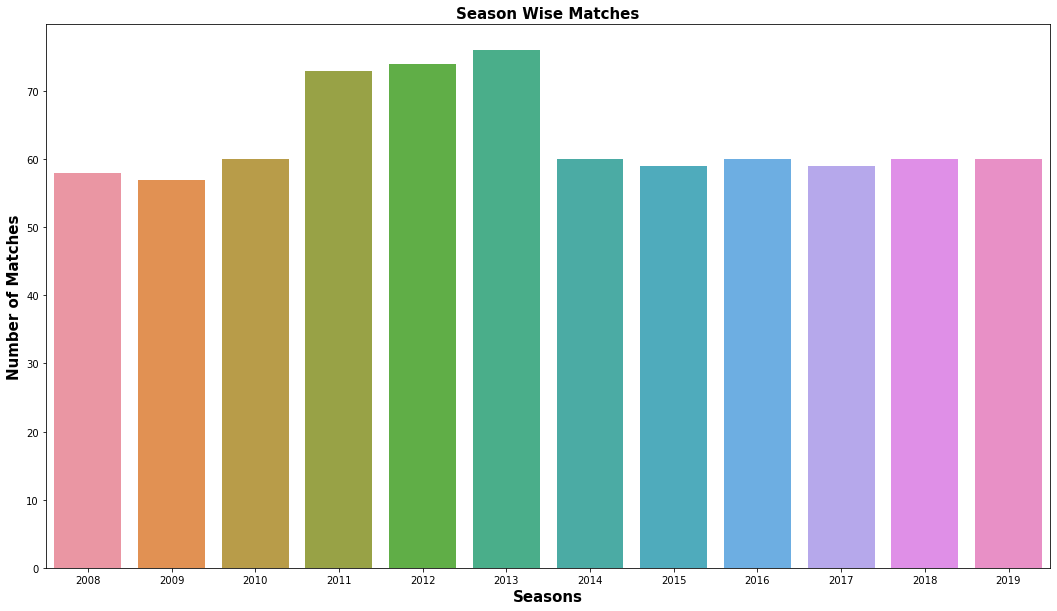

In [9]:
sns.countplot('season',data=match_file)
plt.title('Season Wise Matches',fontsize=15,fontweight='bold')
plt.xlabel('Seasons',fontsize=15,fontweight='bold')
plt.ylabel('Number of Matches',fontsize=15,fontweight='bold')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Wins')

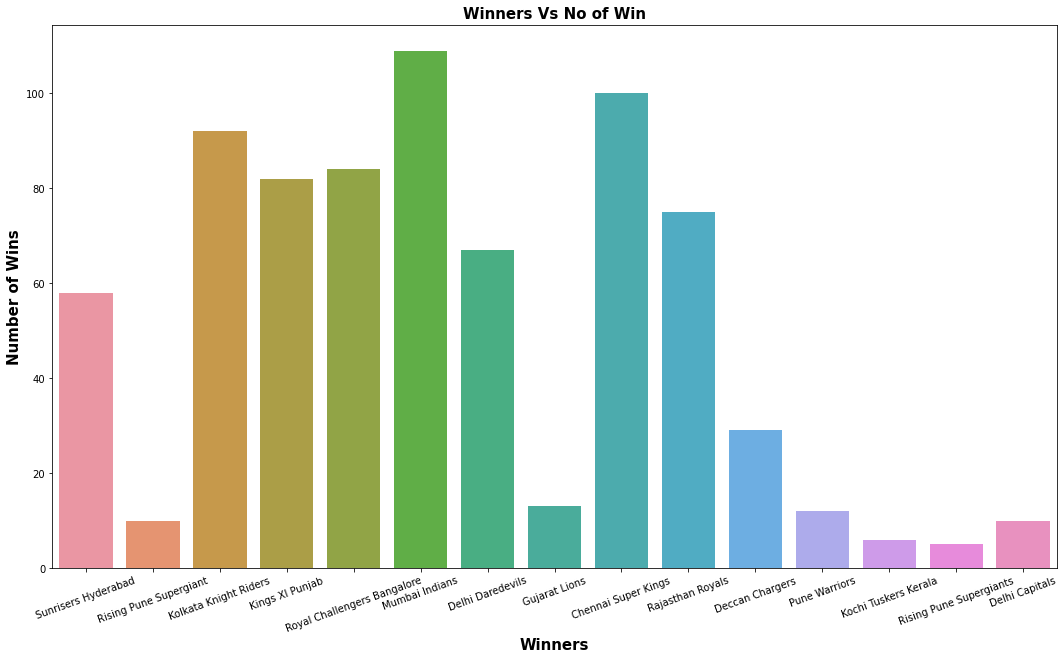

In [10]:
sns.countplot('winner',data=match_file)
plt.title('Winners Vs No of Win',fontsize=15,fontweight='bold')
plt.xlabel('Winners',fontsize=15,fontweight='bold')
plt.xticks(rotation=20)
plt.ylabel('Number of Wins',fontsize=15,fontweight='bold')

In [11]:
match_file['win_by']=np.where(match_file['win_by_runs']>0,'Bat First','Bowl First')

In [12]:
match_file['win_by']

0       Bat First
1      Bowl First
2      Bowl First
3      Bowl First
4       Bat First
          ...    
751    Bowl First
752    Bowl First
753    Bowl First
754    Bowl First
755     Bat First
Name: win_by, Length: 756, dtype: object

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Wins')

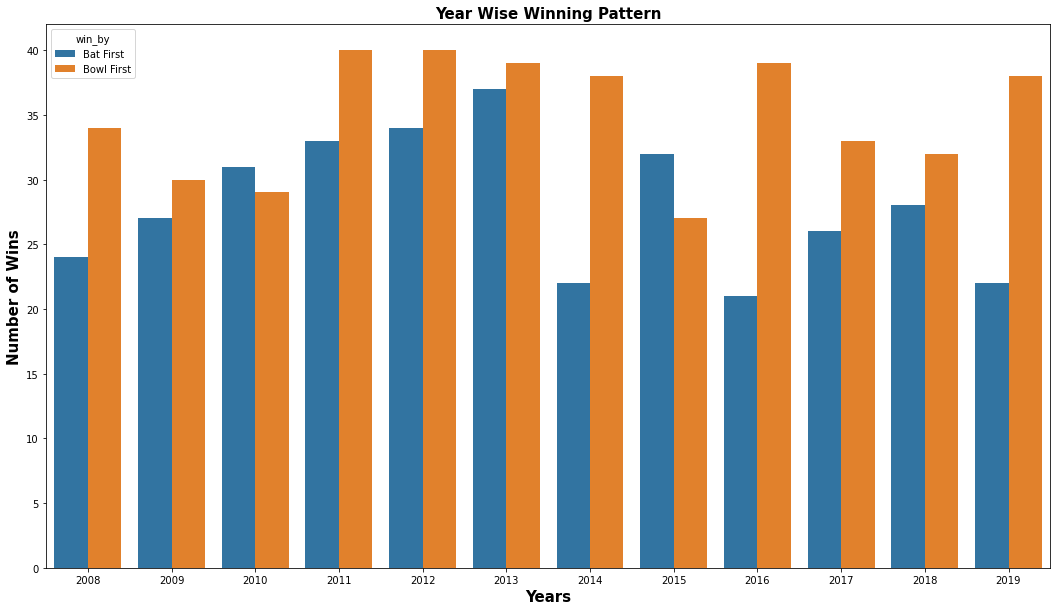

In [13]:
sns.countplot('season',hue='win_by',data=match_file)
plt.title('Year Wise Winning Pattern',fontsize=15,fontweight='bold')
plt.xlabel('Years',fontsize=15,fontweight='bold')
plt.ylabel('Number of Wins',fontsize=15,fontweight='bold')

In [14]:
final_winners=match_file.drop_duplicates(subset='season',keep='last')

In [15]:
final_winners[['season','winner']].sort_values('season').reset_index(drop=True)

,season,winner
0,2008,Rajasthan Royals
1,2009,Deccan Chargers
2,2010,Chennai Super Kings
3,2011,Chennai Super Kings
4,2012,Kolkata Knight Riders
5,2013,Mumbai Indians
6,2014,Kolkata Knight Riders
7,2015,Mumbai Indians
8,2016,Sunrisers Hyderabad
9,2017,Mumbai Indians


In [16]:
highest_scorer=match_file.player_of_match.value_counts()[:10]

In [17]:
highest_scorer

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

Text(0, 0.5, 'Number of Times')

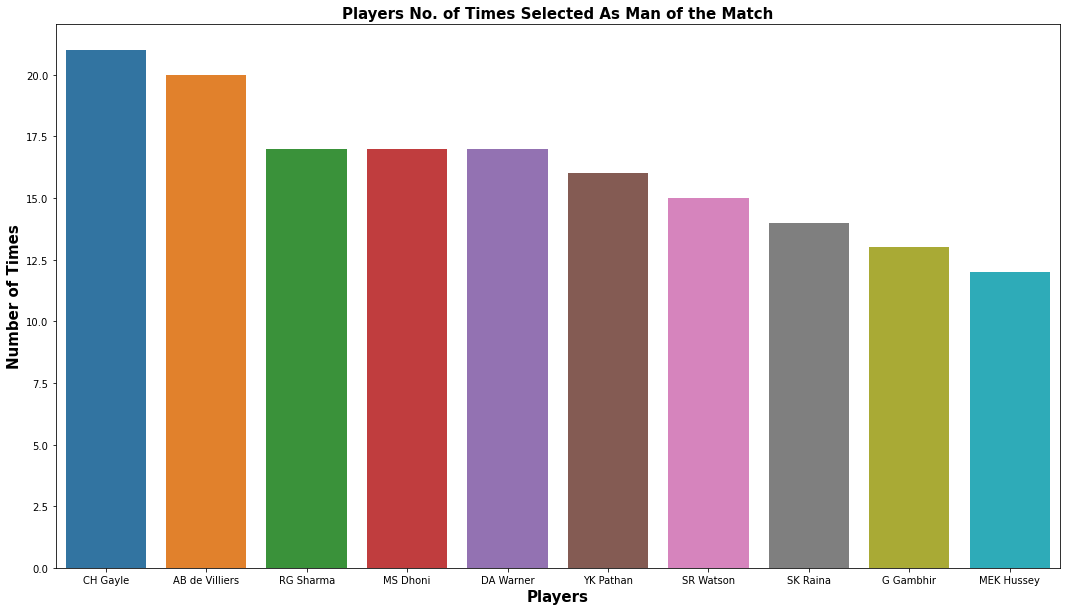

In [18]:
sns.barplot(x=highest_scorer.index,y=highest_scorer,data=match_file)
plt.title('Players No. of Times Selected As Man of the Match',fontsize=15,fontweight='bold')
plt.xlabel('Players',fontsize=15,fontweight='bold')
plt.ylabel('Number of Times',fontsize=15,fontweight='bold')

In [19]:
final_winners.groupby(['city','winner']).size()

city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

In [20]:
final_winners[['toss_winner','toss_decision','winner','player_of_match']].reset_index(drop=True)

,toss_winner,toss_decision,winner,player_of_match
0,Mumbai Indians,bat,Mumbai Indians,KH Pandya
1,Rajasthan Royals,field,Rajasthan Royals,YK Pathan
2,Royal Challengers Bangalore,field,Deccan Chargers,A Kumble
3,Chennai Super Kings,bat,Chennai Super Kings,SK Raina
4,Chennai Super Kings,bat,Chennai Super Kings,M Vijay
5,Chennai Super Kings,bat,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,bat,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,field,Kolkata Knight Riders,MK Pandey
8,Chennai Super Kings,field,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,BCJ Cutting


In [21]:
deliveries_file.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [22]:
fours=deliveries_file[deliveries_file['batsman_runs']==4]

In [23]:
fours

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
13,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,7,MC Henriques,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
30,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,5,5,MC Henriques,S Dhawan,S Aravind,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
32,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,6,1,S Dhawan,MC Henriques,SR Watson,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179028,11415,2,Chennai Super Kings,Mumbai Indians,12,6,SR Watson,MS Dhoni,RD Chahar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
179050,11415,2,Chennai Super Kings,Mumbai Indians,16,3,SR Watson,DJ Bravo,SL Malinga,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
179051,11415,2,Chennai Super Kings,Mumbai Indians,16,4,SR Watson,DJ Bravo,SL Malinga,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
179052,11415,2,Chennai Super Kings,Mumbai Indians,16,5,SR Watson,DJ Bravo,SL Malinga,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
